In [1]:
import pandas as pd
import numpy as np
import duckdb as db
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_excel("C:/Users/elifs/OneDrive/Masaüstü/new_watson_healthcare_modified.xlsx")

In [7]:
# Average age of employees #
db.query("""
    SELECT Round(AVG(age),2) AS AvgAe
    FROM df
""").to_df()

,AvgAe
0,36.87


In [15]:
# Average age by education field #
db.query("""
    SELECT  EducationField, Round(AVG(age),2) AS EFAvgAge
    FROM df
    GROUP BY EducationField
""").to_df()

,EducationField,EFAvgAge
0,Medical,36.93
1,Technical Degree,36.05
2,Marketing,37.82
3,Human Resources,37.21
4,Life Sciences,36.88
5,Other,35.59


In [18]:
# Average age by job role #
db.query("""
    SELECT JobRole, Round(AVG(age),2) AS JRAvgAge
    FROM df
    GROUP BY JobRole
""").to_df()

,JobRole,JRAvgAge
0,Therapist,38.58
1,Nurse,36.10
2,Administrative,45.41
3,Admin,46.13
4,Other,35.33


In [16]:
# Number of person by department #
db.query("""
SELECT Department, COUNT(*) AS PersonNumber
FROM df
GROUP BY Department
ORDER BY personnumber;
""").to_df()

,Department,PersonNumber
0,Neurology,349
1,Cardiology,531
2,Maternity,796


In [22]:
db.query("""
SELECT Attrition, ROUND(AVG(DistanceFromHome), 2) AS AvgDistance
FROM df
GROUP BY Attrition;
""").to_df()

,Attrition,AvgDistance
0,No,8.91
1,Yes,11.57


In [25]:
db.query("""
SELECT Attrition, ROUND(AVG(TotalWorkingYears), 2) AS AvgTWY
FROM df
GROUP BY Attrition;
""").to_df()

,Attrition,AvgTWY
0,No,12.01
1,Yes,6.34


In [17]:
db.query("""
SELECT BusinessTravel,
       COUNT(*) AS PersonNumber,
       SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) AS Leaver,
       ROUND(100.0 * SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) AS AttritionRate
FROM df
GROUP BY BusinessTravel;
""").to_df()

,BusinessTravel,PersonNumber,Leaver,AttritionRate
0,Travel_Frequently,320,57.0,17.81
1,Non-Travel,172,16.0,9.30
2,Travel_Rarely,1184,126.0,10.64


In [57]:
db.query("""
SELECT 
    CASE 
        WHEN Age < 30 THEN '18-29'
        WHEN Age BETWEEN 30 AND 39 THEN '30-39'
        WHEN Age BETWEEN 40 AND 49 THEN '40-49'
        ELSE '50+' 
    END AS AgeGroup,
    COUNT(*) AS PersonNumber,
    SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) AS Leaver,
    ROUND(100.0 * SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) AS AttritionRate
FROM df
GROUP BY AgeGroup
ORDER BY AgeGroup ASC;
""").to_df()

,AgeGroup,PersonNumber,Leaver,AttritionRate
0,18-29,385,101.0,26.23
1,30-39,701,69.0,9.84
2,40-49,395,17.0,4.30
3,50+,195,12.0,6.15


In [62]:
db.query("""
SELECT WorkLifeBalance, ROUND(AVG(MonthlyIncome), 2) AS AvgMI,
       COUNT(*) AS PersonNumber,
       SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) AS LeaverPN,
       ROUND(100.0 * SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) AS AttritionRate
FROM df
GROUP BY WorkLifeBalance
ORDER BY WorkLifeBalance ASC;
""").to_df()

,WorkLifeBalance,AvgMI,PersonNumber,LeaverPN,AttritionRate
0,1,5796.59,90,24.0,26.67
1,2,6369.37,385,54.0,14.03
2,3,6599.85,1028,100.0,9.73
3,4,6723.31,173,21.0,12.14


In [64]:
db.query("""
SELECT OverTime,
       COUNT(*) AS PersonNumber,
       SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) AS LeaverPN,
       ROUND(100.0 * SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) AS AttritionRate
FROM df
GROUP BY OverTime;
""").to_df()

,OverTime,PersonNumber,LeaverPN,AttritionRate
0,No,1200,60.0,5.0
1,Yes,476,139.0,29.2


In [67]:
db.query("""
SELECT MaritalStatus,
       COUNT(*) AS PersonNumber,
       SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) AS LeaverPN,
       ROUND(100.0 * SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) AS AttritionRate
FROM df
GROUP BY MaritalStatus
ORDER BY AttritionRate ASC;
""").to_df()

,MaritalStatus,PersonNumber,LeaverPN,AttritionRate
0,Divorced,377,24.0,6.37
1,Married,777,61.0,7.85
2,Single,522,114.0,21.84


In [70]:
db.query("""
SELECT 
       CASE 
        WHEN YearsSinceLastPromotion < 2 THEN '0-1'
        WHEN YearsSinceLastPromotion BETWEEN 2 AND 4 THEN '2-4'
        ELSE '5+'
       END AS YSLPGroup,
       COUNT(*) AS PersonNumber,
       SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) AS LeaverPN,
       ROUND(100.0 * SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) AS AttritionRate
FROM df
GROUP BY YSLPGroup
ORDER BY YSLPGroup ASC;
""").to_df()

,YSLPGroup,PersonNumber,LeaverPN,AttritionRate
0,0-1,1062,143.0,13.47
1,2-4,315,35.0,11.11
2,5+,299,21.0,7.02


In [73]:
db.query("""
SELECT 
       CASE 
        WHEN YearsWithCurrManager < 2 THEN '0-1'
        WHEN YearsWithCurrManager BETWEEN 2 AND 4 THEN '2-4'
        ELSE '5+'
       END AS YWCMGroup,
       COUNT(*) AS PersonNumber,
       SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) AS LeaverPN,
       ROUND(100.0 * SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) AS AttritionRate
FROM df
GROUP BY YWCMGroup
ORDER BY YWCMGroup ASC;
""").to_df()

,YWCMGroup,PersonNumber,LeaverPN,AttritionRate
0,0-1,380,94.0,24.74
1,2-4,667,72.0,10.79
2,5+,629,33.0,5.25


In [74]:
db.query("""
SELECT 
       CASE 
        WHEN YearsSinceLastPromotion < 2 THEN '0-1'
        WHEN YearsSinceLastPromotion BETWEEN 2 AND 4 THEN '2-4'
        ELSE '5+'
       END AS YSLPGroup,
       COUNT(*) AS PersonNumber,
       SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) AS LeaverPN,
       ROUND(100.0 * SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) AS AttritionRate
FROM df
GROUP BY YSLPGroup
ORDER BY YSLPGroup ASC;
""").to_df()

,YSLPGroup,PersonNumber,LeaverPN,AttritionRate
0,0-1,1062,143.0,13.47
1,2-4,315,35.0,11.11
2,5+,299,21.0,7.02


In [76]:
db.query("""
SELECT 
       CASE 
        WHEN TotalWorkingYears < 2 THEN '0-1'
        WHEN TotalWorkingYears BETWEEN 2 AND 4 THEN '2-4'
        ELSE '5+'
       END AS TWYGroup,
       COUNT(*) AS PersonNumber,
       SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) AS LeaverPN,
       ROUND(100.0 * SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) AS AttritionRate
FROM df
GROUP BY TWYGroup
ORDER BY TWYGroup ASC;
""").to_df()

,TWYGroup,PersonNumber,LeaverPN,AttritionRate
0,0-1,105,53.0,50.48
1,2-4,156,30.0,19.23
2,5+,1415,116.0,8.20


In [77]:
db.query("""
WITH AgeGroups AS (
    SELECT 
        CASE 
            WHEN Age < 30 THEN '18-29'
            WHEN Age BETWEEN 30 AND 39 THEN '30-39'
            WHEN Age BETWEEN 40 AND 49 THEN '40-49'
            ELSE '50+' 
        END AS AgeGroup,
        OverTime,
        Attrition,
        MonthlyIncome,
        JobSatisfaction
    FROM df
),
OverTimeSummary AS (
    SELECT 
        AgeGroup,
        OverTime,
        COUNT(*) AS PersonCount,
        SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) AS Leavers,
        ROUND(100.0 * SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) AS AttritionRate,
        ROUND(AVG(MonthlyIncome), 2) AS AvgIncome,
        ROUND(AVG(JobSatisfaction), 2) AS AvgSatisfaction
    FROM AgeGroups
    GROUP BY AgeGroup, OverTime
)
SELECT *
FROM OverTimeSummary
ORDER BY AgeGroup ASC, OverTime DESC;
""").to_df()

,AgeGroup,OverTime,PersonCount,Leavers,AttritionRate,AvgIncome,AvgSatisfaction
0,18-29,Yes,112,66.0,58.93,3578.25,2.91
1,18-29,No,273,35.0,12.82,3784.51,2.68
2,30-39,Yes,184,51.0,27.72,5765.01,2.73
3,30-39,No,517,18.0,3.48,5474.90,2.78
4,40-49,Yes,114,12.0,10.53,8288.12,2.82
5,40-49,No,281,5.0,1.78,8870.93,2.60
6,50+,Yes,66,10.0,15.15,11185.59,2.53
7,50+,No,129,2.0,1.55,11012.64,2.88


In [3]:
df = df.copy()
df["Attrition"] = df["Attrition"].map({"Yes":1, "No":0})

In [4]:
for c in ["EmployeeID", "EducationField", "EducationField", "TotalWorkingYears", "TrainingTimesLastYear", "YearsWithCurrManager"]:
    if c in df.columns:
        df.drop(columns=c, inplace=True)

In [5]:
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
cat_cols.append("JobLevel")
print("Kategorik sütunlar:", cat_cols)

Kategorik sütunlar: ['BusinessTravel', 'Department', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'JobLevel']


In [6]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [7]:
X = df_encoded.drop("Attrition", axis=1)
y = df_encoded["Attrition"]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000, class_weight="balanced", random_state=42)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42)

In [119]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))


Accuracy: 0.8809523809523809
ROC AUC: 0.9059121621621622

Classification report:
               precision    recall  f1-score   support

           0     0.9672    0.8953    0.9298       296
           1     0.5000    0.7750    0.6078        40

    accuracy                         0.8810       336
   macro avg     0.7336    0.8351    0.7688       336
weighted avg     0.9115    0.8810    0.8915       336



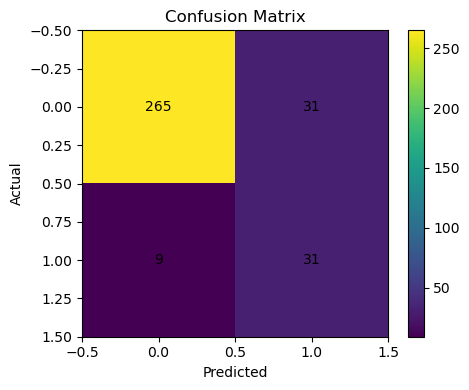

In [83]:
from sklearn.metrics import confusion_matrix as cm
cm = confusion_matrix(y_test, y_pred)
cm = np.array(cm)
plt.figure(figsize=(5,4))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
for (i, j), val in np.ndenumerate(cm):
    plt.text(j, i, val, ha='center', va='center')
plt.tight_layout()
plt.show()

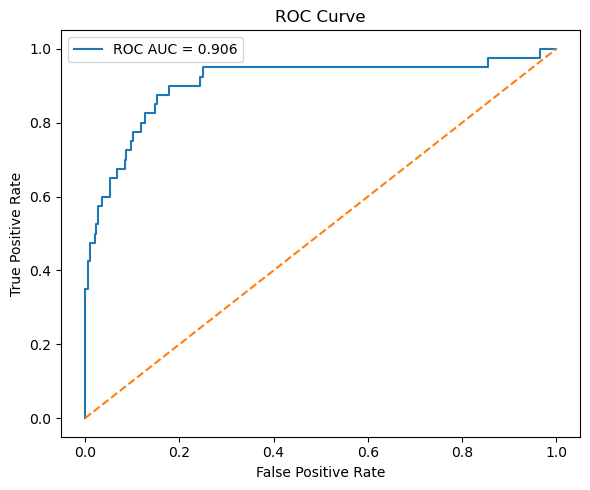

In [84]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc_score(y_test, y_proba):.3f}")
plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()

In [85]:
feature_names = X.columns.tolist()
coefs = pd.Series(model.coef_[0], index=feature_names).sort_values(ascending=False)
print("\nTop positive coefficients (increase attrition odds):")
print(coefs.head(10))
print("\nTop negative coefficients (decrease attrition odds):")
print(coefs.tail(10))



Top positive coefficients (increase attrition odds):
OverTime_Yes                        1.950644
MaritalStatus_Single                1.370876
DistanceFromHome                    1.051041
YearsSinceLastPromotion             1.006812
BusinessTravel_Travel_Frequently    0.755721
NumCompaniesWorked                  0.742320
JobRole_Nurse                       0.553380
MaritalStatus_Married               0.464381
JobRole_Therapist                   0.290891
BusinessTravel_Travel_Rarely        0.238197
dtype: float64

Top negative coefficients (decrease attrition odds):
Department_Maternity      -0.698035
JobLevel_5                -0.760185
JobRole_Administrative    -0.846543
YearsAtCompany            -0.851559
YearsInCurrentRole        -0.872327
MonthlyIncome             -0.944113
EnvironmentSatisfaction   -0.947109
JobInvolvement            -0.991376
Age                       -1.171383
JobLevel_2                -1.539390
dtype: float64


In [11]:
feature_columns = df_encoded.drop("Attrition", axis=1).columns

feature_columns = feature_columns[:X_test.shape[1]]

risk_df = pd.DataFrame(X_test, columns=feature_columns)

# Tahmin olasılıkları ve gerçek değerleri ekle
y_pred_proba = model.predict_proba(X_test)[:, 1]
risk_df['Attrition_Prob'] = y_pred_proba
risk_df['Actual_Attrition'] = y_test.values

print(risk_df.head())

        Age  DistanceFromHome  EnvironmentSatisfaction  JobInvolvement  \
0  0.601507          0.344866                -0.645447        0.393290   
1 -0.841381          0.099122                 1.173479       -1.000913   
2  0.157541         -0.883850                 1.173479       -1.000913   
3 -1.285346         -0.515235                 0.264016       -1.000913   
4 -0.841381         -0.392364                 1.173479       -1.000913   

   JobSatisfaction  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
0        -0.671762      -0.782741            2.184579           1.866187   
1        -1.571922      -0.860003            1.375476           1.319827   
2         1.128559      -0.252786            0.161821           0.773467   
3         0.228399      -0.147137           -0.647283          -1.138794   
4        -0.671762      -0.774630           -0.647283          -1.138794   

   PerformanceRating  RelationshipSatisfaction  ...  JobRole_Therapist  \
0           2.359794    

In [12]:
current_employees = risk_df[risk_df['Actual_Attrition'] == 0]
high_risk_current = current_employees.sort_values('Attrition_Prob', ascending=False)
high_risk_current = high_risk_current[high_risk_current['Attrition_Prob'] > 0.7]

print("Şirkette hâlâ çalışıp yüksek ayrılma riski taşıyan kişi sayısı:", len(high_risk_current))
high_risk_current

Şirkette hâlâ çalışıp yüksek ayrılma riski taşıyan kişi sayısı: 20


,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,...,JobRole_Therapist,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,Attrition_Prob,Actual_Attrition
14,0.601507,-0.883850,-0.645447,0.393290,1.128559,-0.836312,0.970924,-0.319254,-0.423766,1.204311,...,-0.357696,-0.927961,1.469822,1.572101,-0.756816,-0.406469,-0.282444,-0.218388,0.965756,0
312,-1.618321,-0.146621,-0.645447,-2.395117,-1.571922,-0.849972,-0.647283,-0.046074,-0.423766,-1.574868,...,-0.357696,1.077632,-0.680354,-0.636091,-0.756816,-0.406469,-0.282444,-0.218388,0.961656,0
151,-1.618321,-0.638107,0.264016,-1.000913,0.228399,-0.541988,0.970924,0.227106,-0.423766,0.277918,...,-0.357696,-0.927961,1.469822,-0.636091,-0.756816,-0.406469,-0.282444,-0.218388,0.944248,0
111,-1.063364,-0.515235,1.173479,0.393290,1.128559,-0.865339,-1.051835,-0.319254,-0.423766,0.277918,...,-0.357696,-0.927961,1.469822,1.572101,-0.756816,-0.406469,-0.282444,-0.218388,0.932892,0
290,-0.175433,-0.883850,-1.554910,-1.000913,1.128559,-0.320871,-1.051835,-0.319254,-0.423766,0.277918,...,-0.357696,-0.927961,1.469822,1.572101,-0.756816,-0.406469,-0.282444,-0.218388,0.921313,0
251,0.379524,0.836352,0.264016,0.393290,1.128559,0.322629,1.375476,-0.046074,-0.423766,1.204311,...,2.795673,-0.927961,1.469822,1.572101,-0.756816,2.460210,-0.282444,-0.218388,0.920607,0
42,-0.064441,-0.883850,0.264016,0.393290,1.128559,-0.808779,0.161821,1.593007,2.359794,1.204311,...,-0.357696,-0.927961,1.469822,1.572101,-0.756816,-0.406469,-0.282444,-0.218388,0.897913,0
225,-1.174355,1.327838,1.173479,0.393290,-0.671762,-0.914642,-1.051835,-1.138794,-0.423766,0.277918,...,-0.357696,1.077632,-0.680354,1.572101,-0.756816,-0.406469,-0.282444,-0.218388,0.883030,0
228,-0.064441,-0.023749,1.173479,-1.000913,0.228399,-0.649985,-1.051835,0.500286,-0.423766,-1.574868,...,-0.357696,1.077632,-0.680354,1.572101,-0.756816,-0.406469,-0.282444,-0.218388,0.877940,0
24,-0.508407,2.433681,1.173479,0.393290,0.228399,-0.514028,2.589131,-0.865614,-0.423766,-0.648475,...,-0.357696,-0.927961,1.469822,-0.636091,-0.756816,-0.406469,-0.282444,-0.218388,0.874822,0
